<a href="https://colab.research.google.com/github/aashutoshkumarbhardwaj/today1/blob/master/day30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [8]:
df=pd.read_csv('/content/sample_data/Titanic-Dataset.csv', usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [12]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-12-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
x= df.iloc[:,1:3]
y= df.iloc[:,0]

In [15]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

<ipython-input-16-796bd7371371>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


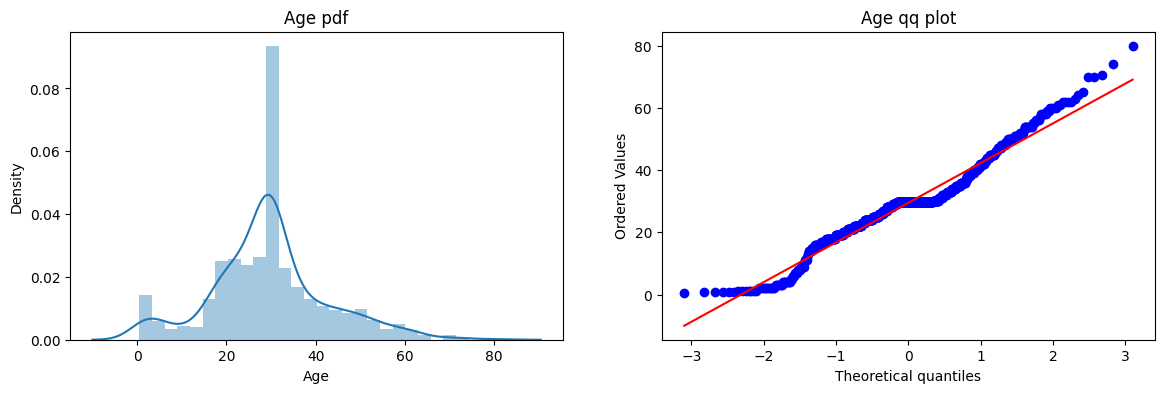

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age qq plot')
plt.show()

<ipython-input-17-06d38955d7a2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


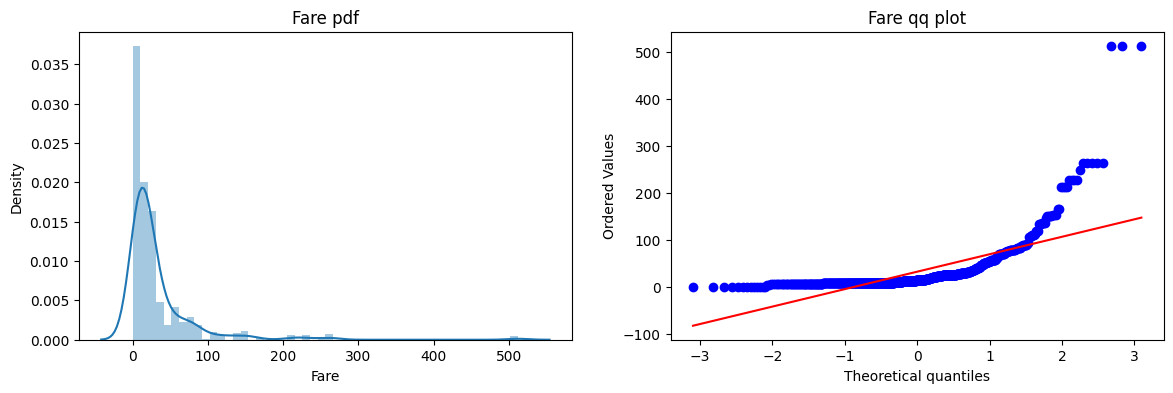

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare qq plot')
plt.show()

In [18]:
clf =LogisticRegression()
clf2=DecisionTreeClassifier()

In [19]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
y_pred =clf.predict(x_test)
y_pred2=clf2.predict(x_test)

In [22]:
print("Accuracy of ", accuracy_score(y_test,y_pred))
print("Accuracy of ",accuracy_score(y_test,y_pred2))

Accuracy of  0.6480446927374302
Accuracy of  0.6703910614525139


In [23]:
trf=FunctionTransformer(func=np.log1p)

In [24]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [25]:
clf= LogisticRegression()
clf2 =DecisionTreeClassifier()

clf.fit(x_train_trf,y_train)
clf2.fit(x_train_trf,y_train)

y_pred=clf.predict(x_test_trf)
y_pred2=clf2.predict(x_test_trf)

print("Accuracy of ", accuracy_score(y_test,y_pred))
print("Accuracy of ",accuracy_score(y_test,y_pred2))

Accuracy of  0.6815642458100558
Accuracy of  0.6871508379888268


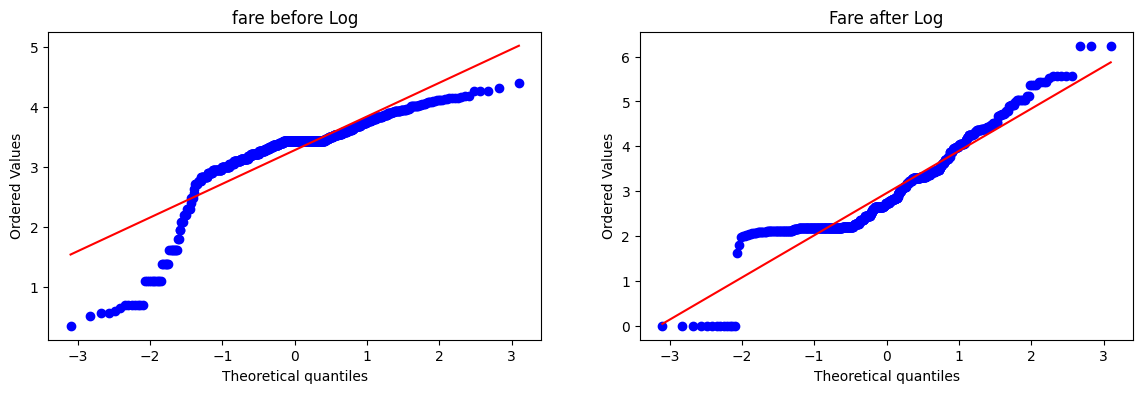

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train_trf['Age'], dist='norm', plot=plt)
plt.title('fare before Log')

plt.subplot(122)
stats.probplot(x_train_trf['Fare'], dist='norm', plot=plt)
plt.title('Fare after Log')

plt.show()

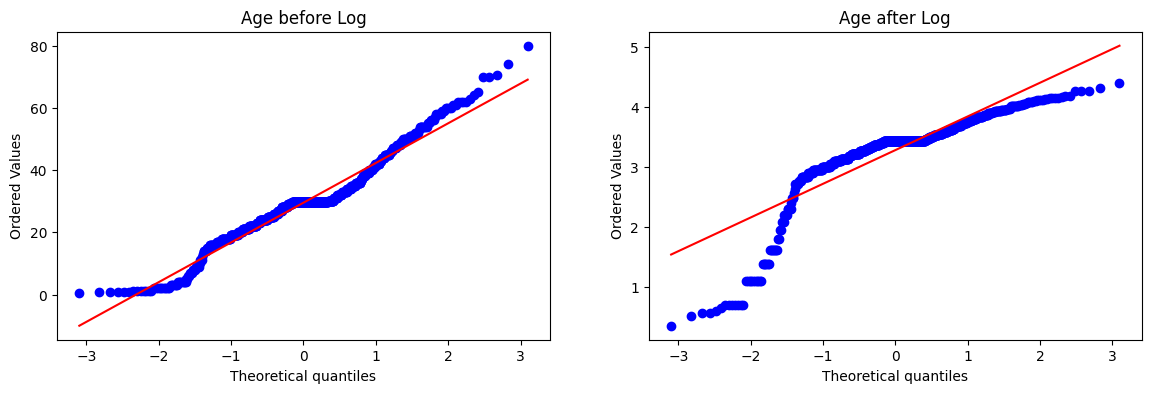

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)

stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(x_train_trf['Age'], dist='norm', plot=plt)
plt.title('Age after Log')

plt.show()

In [31]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

x_train_trf2=trf2.fit_transform(x_train)
x_test_trf2=trf2.transform(x_test)

In [32]:
clf =LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(x_train_trf2,y_train)
clf2.fit(x_train_trf2,y_train)

y_pred=clf.predict(x_test_trf2)
y_pred2=clf2.predict(x_test_trf2)

In [33]:
print ("accuracy of ", accuracy_score(y_test,y_pred))
print ("accuracy of ", accuracy_score(y_test,y_pred2))

accuracy of  0.6703910614525139
accuracy of  0.6759776536312849


In [36]:
from sklearn.model_selection import train_test_split, cross_val_score  # Importing cross_val_score
from sklearn.metrics import accuracy_score
#... (rest of your code) ...

x_transform=trf2.fit_transform(x)

clf=LogisticRegression()
x_transform=trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transform,y,cv=10,scoring='accuracy')))
print("DT",np.mean(cross_val_score(clf2,x_transform,y,cv=10,scoring='accuracy')))

LR 0.6712609238451936
DT 0.6622097378277154


In [37]:
def apply_transform(transform):
    x=df.iloc[:,1:3]
    y=df.iloc[:,0]
    trf=ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    x_transform=trf.fit_transform(x)
    clf=LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,x_transform,y,cv=10,scoring='accuracy')))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare before Log')

    plt.subplot(122)
    stats.probplot(x_transform[:,0], dist='norm', plot=plt)
    plt.title('Fare after Log')

    plt.show()



Accuracy 0.6262796504369538


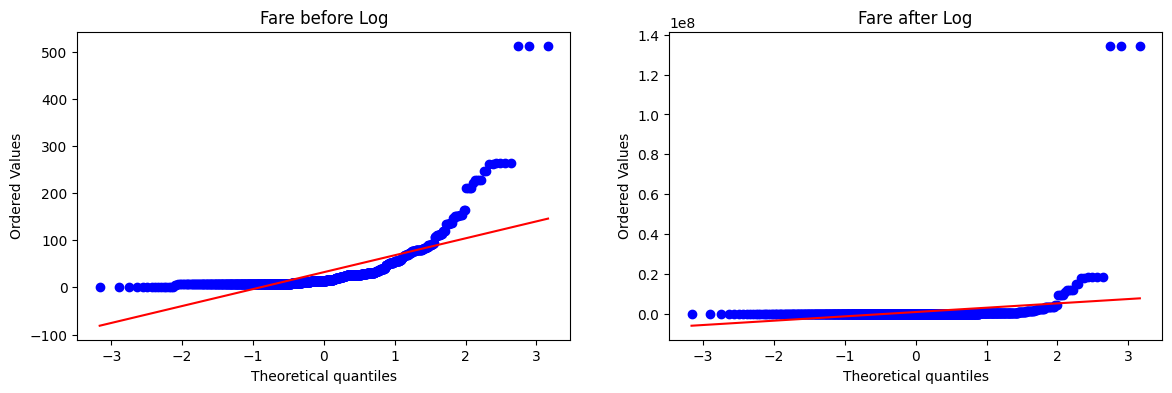

In [41]:
apply_transform(lambda x :x**3)